## Function to generate colours randomly

In [1]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import math

(31,49,217,190)


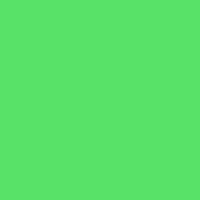

(3,75,101,0)


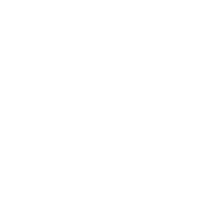

(197,67,202,51)


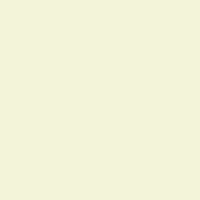

(255,198,171,55)


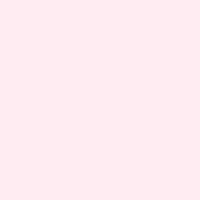

(194,99,204,117)


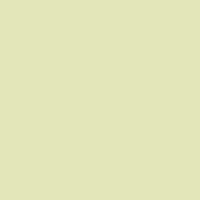

In [2]:
for i in range(5):
    [R,G,B,A]=[random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    img = Image.new('RGBA',(200,200),(R,G,B,A))
    print(f'({R},{B},{G},{A})')
    display(img)

## Function to generate 3D vertices randomly within the boundary

In [26]:
L=5
B=5
H=5

In [27]:
L*B*H

125

In [28]:
numOfVertices=random.randint(3,L*B*H)
numOfVertices

54

In [29]:
%%time
VERTICES=[]
i=0
while i<numOfVertices:
    x=random.uniform(0,L)
    y=random.uniform(0,H)
    z=random.uniform(0,B)
    if [x,y,z] not in VERTICES:
        VERTICES.append([x,y,z])
        i+=1

Wall time: 999 µs


In [30]:
len(VERTICES)

54

## Function to create FACES 

In [31]:
FACES=set()

# A nested loop to iterate through all the vertices
for i in range(numOfVertices):
    for j in range(i + 1, numOfVertices):
        '''
        Generating a random number between 0-1 and if it is greater than 0.5 (thresholding value) we proceed
        to make a connection, else skip to the next vertice.   
        '''
        if random.random() > 0.5:
            # Create a face by connecting the current vertex to all of the other vertices that it is connected to
            face = [i]

            #iterate through all the vertices other than the currently chosen one (i)
            for k in range(numOfVertices):
                if (k != i) and (random.random() > 0.5):
                    face.append(k)
          
        # Add the face to the set of faces
        if len(face)>3:
            FACES.add(tuple(face))
      

In [32]:
len(FACES)

706

In [33]:
print(FACES)

{(14, 3, 4, 8, 9, 12, 13, 16, 18, 20, 21, 23, 24, 26, 31, 37, 38, 39, 42, 43, 44, 45, 47, 49, 50), (22, 0, 2, 4, 5, 6, 13, 14, 17, 19, 21, 23, 25, 30, 35, 36, 38, 39, 42, 43, 45, 48, 49, 51), (14, 1, 2, 3, 4, 6, 7, 9, 10, 13, 16, 17, 22, 23, 28, 29, 32, 33, 34, 36, 48, 50), (3, 2, 4, 6, 8, 10, 12, 16, 17, 21, 23, 24, 25, 26, 29, 31, 35, 39, 40, 43, 44, 45, 48, 49, 50, 51, 52), (5, 2, 4, 7, 11, 13, 14, 15, 16, 18, 20, 21, 23, 24, 26, 30, 32, 33, 34, 37, 40, 41, 43, 44, 49, 53), (12, 0, 3, 4, 5, 6, 8, 9, 10, 13, 14, 18, 20, 21, 22, 24, 25, 27, 29, 31, 34, 36, 37, 38, 40, 41, 42, 46, 51, 52, 53), (3, 0, 1, 4, 6, 7, 9, 10, 11, 15, 16, 17, 20, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 37, 38, 40, 41, 42, 43, 44, 46, 47, 48, 52), (23, 0, 2, 4, 9, 11, 13, 15, 18, 20, 25, 26, 28, 29, 31, 32, 33, 34, 35, 37, 39, 41, 42, 43, 44, 47, 49, 51), (24, 12, 14, 15, 16, 17, 18, 19, 20, 23, 25, 26, 30, 32, 33, 36, 37, 38, 41, 42, 43, 44, 48, 50, 51, 52), (35, 1, 5, 6, 8, 9, 11, 12, 14, 17, 19, 20, 21, 22, 

## Function to Generate one chromosome in a population

In [9]:
def generate_rgbaRo(seed):
    random.seed(seed)
    
    # Randomly generate R,G,B,A and Roughness Factor
    R=random.randint(0,255) #Red
    G=random.randint(0,255) #Green
    B=random.randint(0,255) #Blue
    A=random.uniform(0,1)   #Alpha (Opacity)
    RoughnessFactor=random.uniform(0,1)
    
    return R,G,B,A,RoughnessFactor

In [10]:
def generate_vertices(L,B,H,seed):
    random.seed(seed)
    
    volume=L*B*H
    
    #generate random number of vertices (min-3, max-volume of bounding frame)
    numOfVertices=random.randint(3,volume)
    
    #generate vertices array
    VERTICES=[]
    i=0
    while i<numOfVertices:
        x=random.uniform(0,L)
        y=random.uniform(0,H)
        z=random.uniform(0,B)
        if [x,y,z] not in VERTICES:
            VERTICES.append([x,y,z])
            i+=1
    
    return VERTICES

In [11]:
def generate_faces(numOfVertices,seed):
    random.seed(seed)
    
    FACES=set()

    # A nested loop to iterate through all the vertices
    for i in range(numOfVertices):
        for j in range(i + 1, numOfVertices):
            '''
            Generating a random number between 0-1 and if it is greater than 0.5 (thresholding value) we proceed
            to make a connection, else skip to the next vertice.   
            '''
            if random.random() > 0.5:
                # Create a face by connecting the current vertex to all of the other vertices that it is connected to
                face = [i]

                #iterate through all the vertices other than the currently chosen one (i)
                for k in range(numOfVertices):
                    if (k != i) and (random.random() > 0.5):
                        face.append(k)

                # Add the face to the set of faces
                FACES.add(tuple(face))
      
    
    return list(FACES)

In [12]:
def generate_chromosome(L,B,H,seed):
    '''
    L -> Length of the bounding frame of model to be generated
    B -> Breadth of the bounding frame of model to be generated
    H -> Height of the bounding frame of model to be generated
    seed -> Manauly set random seed for each chromosome in the population 
    '''
    
    r,g,b,a,RoughnessFactor=generate_rgbaRo(seed)
    
    VERTICES=generate_vertices(L,B,H,seed)
    
    FACES=generate_faces(len(VERTICES),seed)
    
    return [r,g,b,a,RoughnessFactor,VERTICES,FACES]
    

In [13]:
CH=generate_chromosome(2,2,2,1)

### Get stats about each chromosome

In [14]:
def get_stats(CH):
    print(f'(R,G,B,A) = ({CH[0]},{CH[1]},{CH[2]},{CH[3]})')
    print(f'Roughness Factor = {CH[4]}')
    print(f'Number of vertices = {len(CH[5])}')
    print(f'Number of faces = {len(CH[6])}')

In [15]:
get_stats(CH)

(R,G,B,A) = (68,32,130,0.11791870367106105)
Roughness Factor = 0.7609624449125756
Number of vertices = 4
Number of faces = 3


###  Generating Population

In [16]:
%%time
L,B,H=5,5,5

P1=[]

for _ in range(2):
    CH=generate_chromosome(L,B,H,random.random())
    P1.append(CH)
    get_stats(CH)
    print('-'*120)

(R,G,B,A) = (52,150,49,0.2222630466925779)
Roughness Factor = 0.23492710834828034
Number of vertices = 16
Number of faces = 71
------------------------------------------------------------------------------------------------------------------------
(R,G,B,A) = (190,194,203,0.3758950433980299)
Roughness Factor = 0.5202774305122234
Number of vertices = 50
Number of faces = 618
------------------------------------------------------------------------------------------------------------------------
Wall time: 17 ms
